# Feature Scaling - Flight cancellation

This notebook explores **2 approaches** to scale numeric features:
1. **StandardScaler** - Standardize features to zero mean and unit variance
2. **MinMaxScaler** - Scale features to a fixed range [0, 1]

Each approach is evaluated using Naive Bayes and KNN classifiers.

In [1]:
import sys
sys.path.insert(1, '../../../../utils')
from pandas import read_csv, DataFrame, Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from dslabs_functions import *
from numpy import ndarray
from matplotlib.pyplot import savefig, show, figure



In [2]:
data: DataFrame = read_csv("../../data/prepared/flight_mvi.csv", na_values="")
target = "Cancelled"
target_name = "Cancelled"
file_tag = "flight"
metric="f1"
lab_folder_sca = "lab3_preparation/scaling"

data = data.sort_values(by="FlightDate", ascending=True)

variable_types: dict[str, list] = get_variable_types(data)
numeric_vars = variable_types['numeric']


## Approach 1: StandardScaler

Standardize features by removing the mean and scaling to unit variance.

Formula: `z = (x - mean) / std_dev`

In [3]:
approach_sca1 = "Standard-Scaler"

data_sca1 = data.copy()
flightdate_data: Series = data_sca1.pop("FlightDate")
target_data: Series = data_sca1.pop(target)

# Scale numeric features
numeric_df = data_sca1[numeric_vars].copy()
transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(numeric_df)
numeric_df_scaled = DataFrame(transf.transform(numeric_df))
data_sca1[numeric_vars] = numeric_df_scaled
data_sca1[target_name] = target_data

In [4]:
# Split data into train and test sets based on FlightDate, using the first 70% for training and the last 30% for testing
split_index = int(len(data_sca1) * 0.7)
train_sca1 = data_sca1.iloc[:split_index].copy()
test_sca1 = data_sca1.iloc[split_index:].copy()

# Target cancelled is boolean, convert to 0 and 1
train_sca1[target_name] = train_sca1[target_name].astype(int)
test_sca1[target_name] = test_sca1[target_name].astype(int)


Running GaussianNB...
0.0007390983000739098
Running MultinomialNB...
Couldn't run MultinomialNB
Running BernoulliNB...
-0.0007390983000739098
GaussianNB()
{'accuracy': 0.97715, 'recall': 0.0007390983000739098, 'precision': 0.05, 'auc': 0.5002075630296898, 'f1': 0.0014566642388929353, 'confusion_matrix': array([[58628,    19],
       [ 1352,     1]])}
{'accuracy': 0.9459333333333333, 'recall': 0.030303030303030304, 'precision': 0.020780537252914344, 'auc': 0.4986800843877932, 'f1': 0.02465423932651834, 'confusion_matrix': array([[56715,  1932],
       [ 1312,    41]])}
{'accuracy': [0.97715, 0.9459333333333333], 'recall': [0.0007390983000739098, 0.030303030303030304], 'precision': [0.05, 0.020780537252914344], 'auc': [0.5002075630296898, 0.4986800843877932], 'f1': [0.0014566642388929353, 0.02465423932651834], 'confusion_matrix': [array([[58628,    19],
       [ 1352,     1]]), array([[56715,  1932],
       [ 1312,    41]])]}


TypeError: only length-1 arrays can be converted to Python scalars

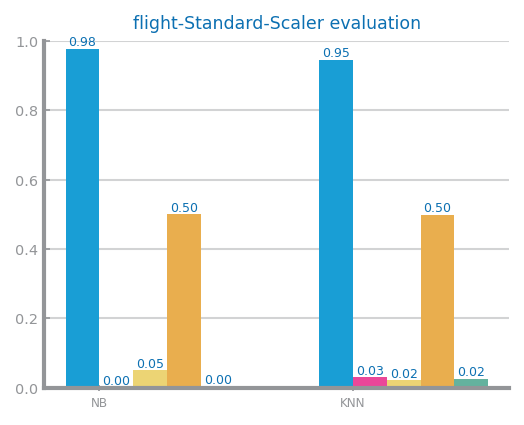

In [5]:
figure()
eval: dict[str, list] = evaluate_approach(train_sca1, test_sca1, target=target, metric="recall")
print(eval)
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag}-{approach_sca1} evaluation", percentage=True
)
savefig(f"../../charts/{lab_folder_sca}/{file_tag}_{approach_sca1}_nb_vs_knn_performance.png", bbox_inches='tight')
show()

# Restore FlightDate column
data_sca1["FlightDate"] = flightdate_data

## Approach 2: MinMaxScaler

Transform features by scaling each feature to the range [0, 1].

Formula: `x_scaled = (x - x_min) / (x_max - x_min)`

In [ ]:
approach_sca2 = "MinMax-Scaler"

data_sca2 = data.copy()
flightdate_data: Series = data_sca2.pop("FlightDate")
target_data: Series = data_sca2.pop(target)

# Scale numeric features
numeric_df = data_sca2[numeric_vars].copy()
transf: MinMaxScaler = MinMaxScaler(feature_range=(0,1), copy=True).fit(numeric_df)
numeric_df_scaled = DataFrame(transf.transform(numeric_df))
data_sca2[numeric_vars] = numeric_df_scaled
data_sca2[target_name] = target

In [ ]:
# Split data into train and test sets based on FlightDate, using the first 70% for training and the last 30% for testing
split_index = int(len(data_sca2) * 0.7)
train_sca2 = data_sca2.iloc[:split_index].copy()
test_sca2 = data_sca2.iloc[split_index:].copy()

figure()
eval: dict[str, list] = evaluate_approach(train_sca2, test_sca2, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag}-{approach_sca2} evaluation", percentage=True
)
savefig(f"../../charts/{lab_folder_sca}/{file_tag}_{approach_sca2}_nb_vs_knn_performance.png", bbox_inches='tight')
show()

# Restore FlightDate column
data_sca2["FlightDate"] = flightdate_data

In [ ]:
# Uncomment to save individual results
data_sca1.to_csv(f"../../data/prepared/{file_tag}_scaling_{approach_sca1}.csv", index=False)
data_sca2.to_csv(f"../../data/prepared/{file_tag}_scaling_{approach_sca2}.csv", index=False)